# Lab1  Naive Bayes Gaussian - Babies, Teens and Adults
## Modified by : Santiago Carvajal Castañeda

### Generating some training data
Each indiviudal has two atributes (x0,x1) 

* x0  is heigth and 
* x1  is weight 

There are two clases of individuals

* children and 
* adults

We generate 160 training examples 

* 50 babies ~ Gaussian([60, 30], [[50,15],[15, 30]])
* 70 tens ~ Gaussian([120, 50], [[90,10 ],[10, 40]])
* 120 adults ~ Gaussian([150, 80], [[60, 10],[10, 40]])

In [1]:
import numpy as np
import matplotlib.pyplot as plt
babies = np.random.multivariate_normal([60, 30], [[50,15],[15, 30]], 50)
children = np.random.multivariate_normal([120, 50], [[90,10 ],[10, 40]], 70)
adults = np.random.multivariate_normal([150, 80], [[60, 10],[10, 40]], 120)
x = np.concatenate((babies, children ,adults),axis=0)
y1 = np.empty(len(babies))
y2 = np.empty(len(children))
y3 = np.empty(len(adults))
y1.fill(0)
y2.fill(1)
y3.fill(2)
y = np.concatenate((y1,y2,y3),axis=0)

color= ['red' if v == 0 else ('green' if v == 1 else 'blue') for v in y]
plt.scatter(x[:,0].tolist(), x[:,1].tolist(),  c=color, s=50)
plt.title('Data Set', size=14);

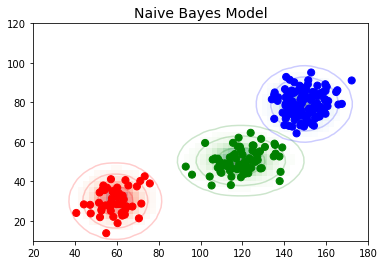

In [2]:
fig, ax = plt.subplots()
color= ['red' if v == 0 else ('green' if v == 1 else 'blue') for v in y]
ax.scatter(x[:,0].tolist(), x[:,1].tolist(),  c=color, s=50);
ax.set_title('Naive Bayes Model', size=14)
xlim = (20, 180)
ylim = (10, 120)

xg = np.linspace(xlim[0], xlim[1], 60)
yg = np.linspace(ylim[0], ylim[1], 40)
xx, yy = np.meshgrid(xg, yg)
Xgrid = np.vstack([xx.ravel(), yy.ravel()]).T

for label, color in enumerate(['red', 'green','blue']):
    mask = (y == label)
    mu, std = x[mask].mean(0), x[mask].std(0)
    P = np.exp(-0.5 * (Xgrid - mu) ** 2 / std ** 2).prod(1)
    Pm = np.ma.masked_array(P, P < 0.03)
    ax.pcolorfast(xg, yg, Pm.reshape(xx.shape), alpha=0.5,
                  cmap=color.title() + 's')
    ax.contour(xx, yy, P.reshape(xx.shape),
               levels=[0.01, 0.1, 0.5, 0.9],
               colors=color, alpha=0.2)
    
ax.set(xlim=xlim, ylim=ylim);

In [3]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x, y);

### The desicion boundary in Gaussian naive Bayes is quadratic.

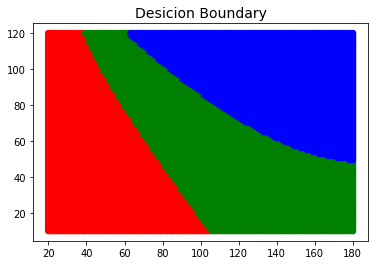

In [4]:
x0 =  np.linspace(20,180,101)
x1 =  np.linspace(10,120,101)
g = np.meshgrid(x0,x1)
xmesh = np.append(g[0].reshape(-1,1),g[1].reshape(-1,1),axis=1)
ymesh= model.predict(xmesh)

colormesh= ['red' if v == 0 else ('green' if v == 1 else 'blue') for v in ymesh]
plt.scatter(xmesh[:, 0], xmesh[:, 1], c=colormesh )
plt.title('Desicion Boundary', size=14);

### Testing the model with some random data

In [5]:
rng = np.random.RandomState(0)
xnew = [20, 10] + [160, 110] * rng.rand(500, 2)

ynew = model.predict(xnew)

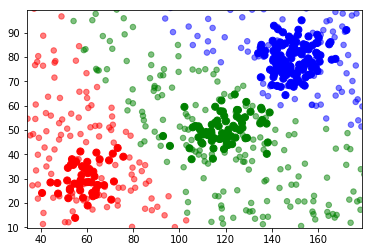

In [6]:
color= ['red' if v == 0 else ('green' if v == 1 else 'blue') for v in y]
plt.scatter(x[:,0].tolist(), x[:,1].tolist(),  c=color, s=50);
lim = plt.axis()

colornew= ['red' if v == 0 else ('green' if v == 1 else 'blue') for v in ynew]
plt.scatter(xnew[:, 0], xnew[:, 1], c=colornew, s=30,  alpha=0.5)
plt.axis(lim);

### Pobabilistic classification - posterior probabilities for the classes

In [7]:
print(xnew)
xnew[-20:].round(2)

[[107.81016063  88.6708303 ]
 [116.44214017  69.93715013]
 [ 87.78476789  81.04835244]
 [ 90.0139538  108.09503009]
 [174.18604168  52.17856707]
 [146.67600609  68.17844117]
 [110.88712978 111.81563021]
 [ 31.36576931  19.58422297]
 [ 23.23494359 101.58818301]
 [144.50508015 105.70133631]
 [176.57893476  97.90744206]
 [ 93.83669796  95.85820939]
 [ 38.92390814  80.39131235]
 [ 42.93652599 113.91358088]
 [103.49573148  55.6128134 ]
 [ 62.32889794  95.16570584]
 [ 92.98405315  72.52773438]
 [ 23.00636807  77.93990468]
 [117.93531564  77.86273966]
 [170.99969256  85.0002329 ]
 [ 77.52126409  58.07351492]
 [131.62099135  16.62480188]
 [126.68267447  83.77016566]
 [ 53.66120977  24.18189274]
 [ 70.46853615  50.0081848 ]
 [111.23148327  58.24616648]
 [178.13981409  21.22492918]
 [ 53.42028098  27.74404697]
 [124.49733207  37.86207628]
 [ 94.60972366  36.88681512]
 [ 45.43513338  22.14126553]
 [125.01273431  25.20012465]
 [ 51.45317787  50.55976877]
 [151.35891678  20.68114034]
 [154.0711852 

array([[ 55.22,  78.52],
       [ 37.84,  60.49],
       [ 71.57,  44.82],
       [ 97.21,  90.28],
       [ 31.07, 106.71],
       [137.57,  29.41],
       [170.27,  65.69],
       [179.97,  31.7 ],
       [105.59,  41.93],
       [ 68.67,  75.02],
       [167.48,  98.58],
       [135.83,  71.51],
       [167.57,  64.16],
       [159.81, 101.74],
       [ 54.21,  94.83],
       [ 21.95,  45.51],
       [ 56.73,  65.75],
       [137.9 ,  20.74],
       [102.39, 113.23],
       [ 56.58,  84.49]])

In [8]:
yprob = model.predict_proba(xnew[-20:])
yprob.round(2)

array([[0.96, 0.04, 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.28, 0.72],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.02, 0.98, 0.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [0.15, 0.85, 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 0.  , 1.  ],
       [0.54, 0.46, 0.  ]])

## References
1. Naive Bayes 3: Gaussian examplea  Victor Lavrenko  https://www.youtube.com/watch?v=r1in0YNetG8&amp;list=PLBv09BD7ez_7-4V3IJIzCHWQj9nd4rVWB&amp;index=3
2. In Depth: Naive Bayes Classification https://jakevdp.github.io/PythonDataScienceHandbook/06.00-figure-code.html#Gaussian-Naive-Bayes
3. 6 Easy Steps to Learn Naive Bayes Algorithm (with codes in Python and R)
https://www.analyticsvidhya.com/blog/2017/09/naive-bayes-explained/